***

## Pandas第一课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas1/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。
***

In [1]:
import pandas as pd
%matplotlib inline

## 作业

##### 说明：我们下面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。


#### 1.构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。


In [2]:
prices = pd.Series([3,20, 4, 5, 1])
units = pd.Series(['公斤','箱', '斤', '瓶', '个'])
quantity = pd.Series([3,20, 4, 5, 1])

#### 2.然后把这三个Series合并成一个DataFrame

In [3]:
df = pd.DataFrame({"price":prices, "unit": units, "quantity": quantity})
df

,price,unit,quantity
0,3,公斤,3
1,20,箱,20
2,4,斤,4
3,5,瓶,5
4,1,个,1


#### 3.请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图


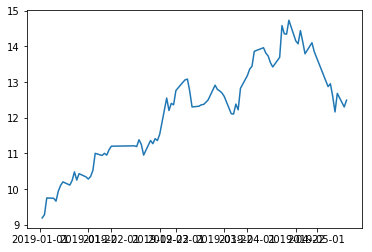

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv("tushare_000001SZ.csv")
df.set_index(pd.to_datetime(df.trade_date.astype(str)), inplace=True)
df.sort_index(inplace=True)
df.index

# plt.figure(figsize=(300, 100))
plt.plot(df.index, df["close"])
plt.show()

#### 4. 0.Teacher/data/文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存活情况。请把这个文件读入成一个pandas dataframe

In [5]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### 5.把每一列中的sex，sex为male的都改成1，sex为female的改成0,

In [7]:
var_map = {"female":0, "male":1}
df_titanic["Sex"] = df_titanic["Sex"].apply(lambda x: var_map[x])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


#### 6.把Cabin中的NaN都填充成0 (使用fillna方法)

In [8]:
df_titanic.Cabin.fillna("0", inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


#### 7.现在我们想把乘客按照年龄做一个分类
- 年龄在0-11岁的为0类,12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类
- 请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄


In [9]:
mean_age = df_titanic.Age.mean()

def process_age(age):
    if pd.isna(age):
        age = mean_age
    if age <= 11:
        result = "0"
    elif age <= 22:
        result = "1"
    elif age <=33:
        result = "2"
    elif age <= 44:
        result = "3"
    elif age <= 55:
        result = "4"
    elif age <= 66:
        result = "5"
    else:
        result = "6"
    return result

df_titanic["Age"] = df_titanic.Age.apply(process_age)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,2,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,3,0,0,373450,8.0500,0,S
